# **Project name : Book Recommendation System**

## **Project Type : Unsupervised ML**
---
---



## **Project summary :**

---
---

### During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys. In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create recommendation system for users.

## **Data Description :**

---

---

### The Book-Crossing dataset comprises of 3 files.
### **1. Users :**
### Contains the users. The user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.
### **2. Books :**
### Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book_Title, Book_Author, Year_Of_Publication, Publisher), obtained from Amazon Web Services. In the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image_URL_S, Image_URL_M, Image_URL_L), i.e., small, medium, large. These URLs point to the Amazon website.
### **3. Ratings :**
### Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [100]:
# importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from scipy.sparse import csr_matrix
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

from skimage import io

import warnings
warnings.filterwarnings("ignore")

In [101]:
# mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
# reading the books dataset
books_df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT/Project-4 (Unsupervised ML)/Books.csv',
            names=['ISBN', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 'Image_URL_S', 'Image_URL_M', 'Image_URL_L'], header=0)

In [103]:
# reading the users dataset
users_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT/Project-4 (Unsupervised ML)/Users.csv')

In [104]:
# loading the book ratings dataset
ratings_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT/Project-4 (Unsupervised ML)/Ratings.csv')

## **Exploratory Data Analysis on books_df**

In [105]:
# First look of the books dataset
books_df.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [106]:
# number of rows and columns
print('number of rows : ', books_df.shape[0])
print('number of columns : ', books_df.shape[1])

number of rows :  271360
number of columns :  8


In [107]:
# Information of the dataset
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book_Title           271360 non-null  object
 2   Book_Author          271359 non-null  object
 3   Year_Of_Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image_URL_S          271360 non-null  object
 6   Image_URL_M          271360 non-null  object
 7   Image_URL_L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [108]:
# Description of the dataset
books_df.describe(include='all')

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [109]:
#checking for duplicates
books_df.duplicated().sum()

0

In [110]:
# List of the columns
books_df.columns.to_list()

['ISBN',
 'Book_Title',
 'Book_Author',
 'Year_Of_Publication',
 'Publisher',
 'Image_URL_S',
 'Image_URL_M',
 'Image_URL_L']

In [111]:
# checking the null values in our dataset
books_df.isna().sum()

ISBN                   0
Book_Title             0
Book_Author            1
Year_Of_Publication    0
Publisher              2
Image_URL_S            0
Image_URL_M            0
Image_URL_L            3
dtype: int64

## Treating Nan value of Book_Author Column :

In [112]:
# finding the row with null value in 'Book_Author' column
books_df[books_df['Book_Author'].isna()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [113]:
books_df[books_df.Book_Title== books_df[books_df['Book_Author'].isna()].reset_index()['Book_Title'][0]]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


### As there is only one book titled **The Credit Suisse Guide to Managing Your Personal Wealth** which has no auther. So we are going to remove that record.

In [114]:
# Dropping Row containing NaN value.
books_df.dropna(subset= 'Book_Author', inplace=True)

In [115]:
# Rechecking
books_df[books_df['Book_Author'].isna()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L


## Treating Nan value of Publisher Column :

In [116]:
# finding the rows with null value in 'Publisher' column
books_df[books_df['Publisher'].isna()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [117]:
books_df[(books_df.Book_Author== 'Elaine Corvidae')|(books_df.Book_Author== 'Linnea Sinclair')]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks,http://images.amazon.com/images/P/1931696934.0...,http://images.amazon.com/images/P/1931696934.0...,http://images.amazon.com/images/P/1931696934.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129001,0759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory,http://images.amazon.com/images/P/0759901880.0...,http://images.amazon.com/images/P/0759901880.0...,http://images.amazon.com/images/P/0759901880.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


### As there is no common rows present, we will remove those rows containing NaN values.

In [118]:
# Dropping Row containing NaN value.
books_df.dropna(subset= 'Publisher', inplace=True)

In [119]:
# Rechecking
books_df[books_df['Publisher'].isna()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L


## Treating Nan value of Image_URL_L Column :

In [120]:
books_df[books_df.Image_URL_L.isna()].reset_index()

,index,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
1,220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
2,221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [121]:
books_df[(books_df.Book_Title== books_df[books_df.Image_URL_L.isna()].reset_index().Book_Title[0])|(books_df.Book_Title== books_df[books_df.Image_URL_L.isna()].reset_index().Book_Title[1])|(books_df.Book_Title== books_df[books_df.Image_URL_L.isna()].reset_index().Book_Title[2])]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


### As there is no common rows present, we will remove those rows containing NaN values.

In [122]:
# Dropping Row containing NaN value.
books_df.dropna(subset= 'Image_URL_L', inplace=True)

In [123]:
# Rechecking
books_df[books_df['Image_URL_L'].isna()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L


In [124]:
books_df.isna().sum()

ISBN                   0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
dtype: int64

## We successfully Treated the Null Values.

In [125]:
books_df['Book_Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: Book_Author, Length: 102020, dtype: int64

In [126]:
Top_author_count = Counter(books_df['Book_Author']).most_common()[:15]

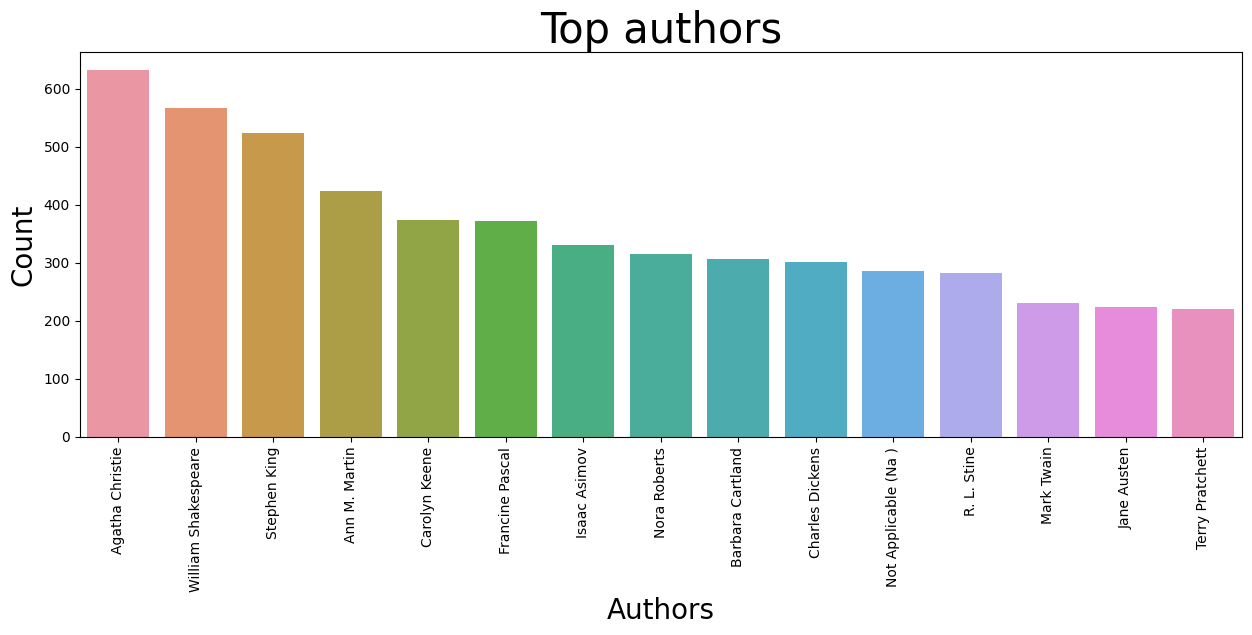

In [127]:
plt.figure(figsize=(15,5))

fig = sns.barplot(x='Book_Author',y='count',data = pd.DataFrame(Top_author_count,columns=['Book_Author','count'][:15]))
fig.set_title('Top authors', fontsize= 30)
fig.set_ylabel('Count', fontsize= 20)
fig.set_xlabel('Authors', fontsize= 20)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);
plt.show()

In [128]:
# Chthe unique values.
books_df['Year_Of_Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

<Axes: >

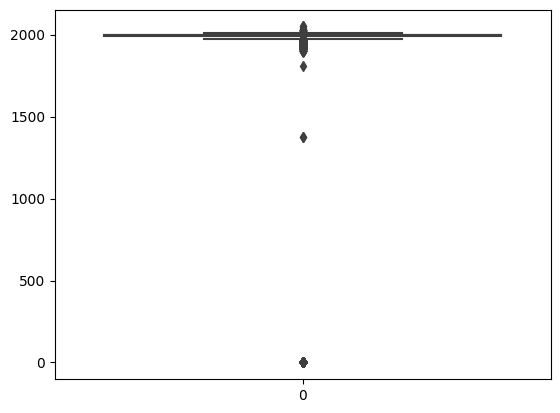

In [133]:
sns.boxplot(books_df['Year_Of_Publication'])

In [134]:
# converting the year column into a numeric column
books_df['Year_Of_Publication'] = pd.to_numeric(books_df['Year_Of_Publication'],errors = 'coerce')

In [136]:
books_df.loc[(books_df['Year_Of_Publication'] > 2021) | (books_df['Year_Of_Publication'] == 0),'Year_Of_Publication']

176       0
188       0
288       0
351       0
542       0
         ..
270794    0
270913    0
271094    0
271182    0
271196    0
Name: Year_Of_Publication, Length: 4631, dtype: int64

In [137]:
books_df['Publisher'].value_counts()

Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company       1
Polaris Books                       1
Hannover House                      1
Amber Quill Press, LLC.             1
Connaught                           1
Name: Publisher, Length: 16803, dtype: int64

Text(0.5, 1.0, 'Top Publishers')

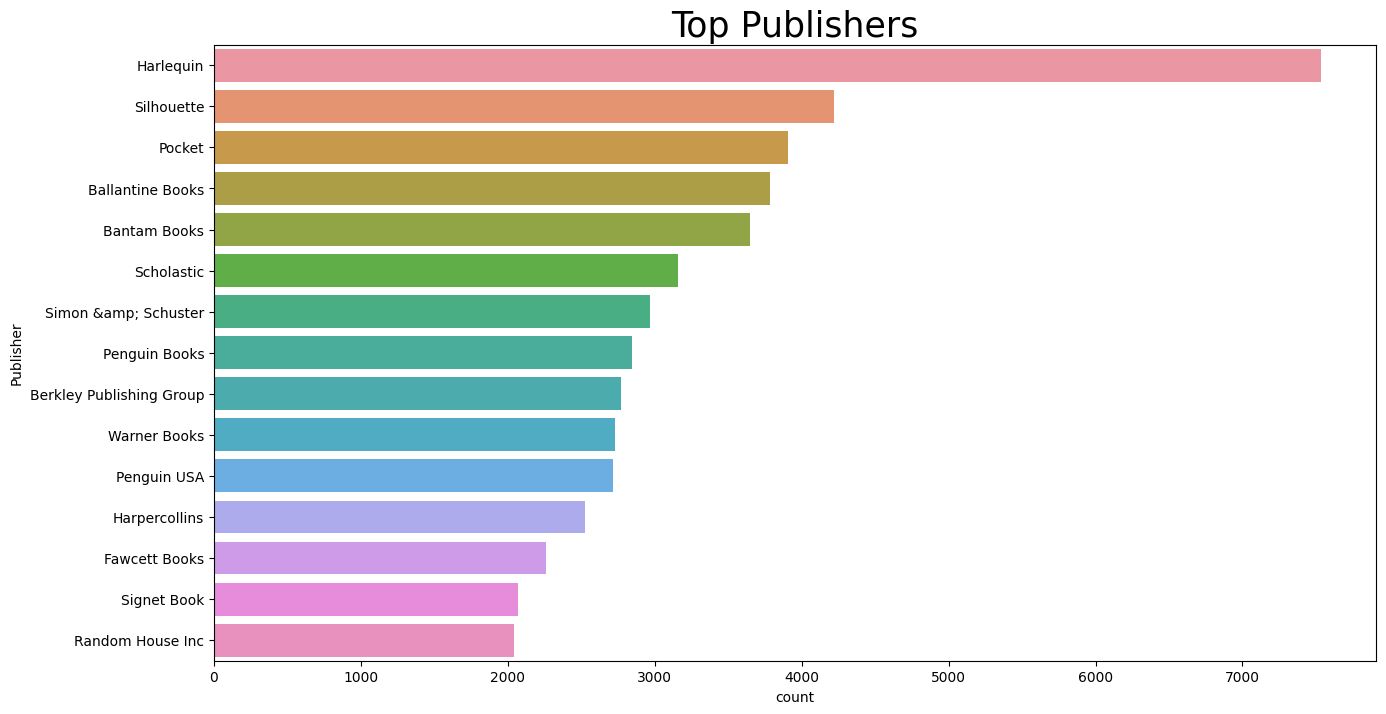

In [138]:
plt.figure(figsize=(15,8))
sns.countplot(y='Publisher',data=books_df,order=pd.value_counts(books_df['Publisher']).iloc[:15].index)
plt.title('Top Publishers',fontsize=25)

## **Exploratory Data Analysis on users_df**

In [ ]:
# first look of users dataset
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# shape of users dataset
print('number of rows :', users_df.shape[0])
print('number of columns :', users_df.shape[1])

number of rows : 278858
number of columns : 3


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
users_df.describe(include = 'all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


In [ ]:
users_df.duplicated().sum()

0

In [ ]:
users_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
print(sorted(users_df.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Text(0.5, 1.0, 'Outliers in Age column')

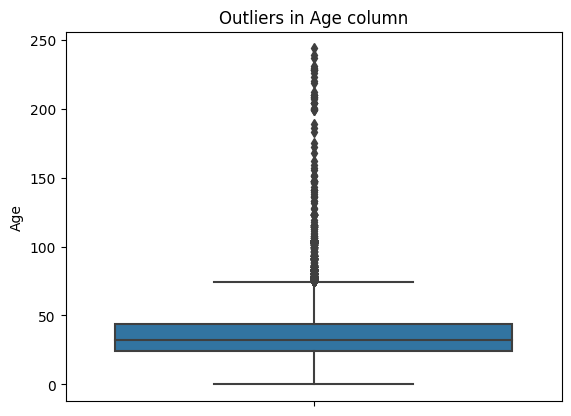

In [ ]:
# lets check the outliers in Age column
sns.boxplot(y='Age',data = users_df)
plt.title('Outliers in Age column')

In [ ]:
# making the outlier values NaN
users_df[(users_df.Age < 5) | (users_df.Age > 100)] = np.nan

Text(0.5, 1.0, 'Age distribution')

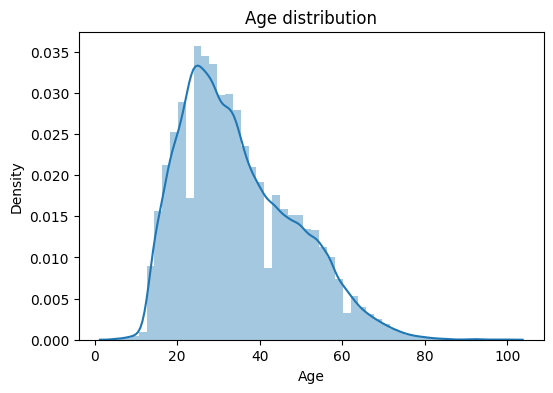

In [ ]:
# checking the distribution of age column
plt.figure(figsize = (6,4))
sns.distplot(users_df['Age'])
plt.title('Age distribution')

In [ ]:
# the distribution of the Age column is rightly skewed, so we can replace the null values with the median
users_df['Age'].fillna(users_df['Age'].median(), inplace=True)

In [ ]:
# checking the unique location names
users_df['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [ ]:
# number of unique locations
users_df['Location'].nunique()

57098

## **Exploratory Data Analysis on ratings_df**

In [ ]:
# first look of the dataset
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print('number of rows :', ratings_df.shape[0])
print('number of columns :', ratings_df.shape[1])

number of rows : 1149780
number of columns : 3


In [ ]:
# information of the rating dataset
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
#checking for duplicates
ratings_df.duplicated().sum()

0

In [ ]:
sorted(ratings_df['Book-Rating'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]